## Uygulamalı Veri Bilimi ve Makine Öğrenimi Eğitim Kampı 

### Kodluyoruz Ağustos-Eylül 2019 Ankara

### 3. hafta

Geçtiğimiz hafta istatistik temellerine değindik

Anahtar kelimeler:
* Z Table
* Normal dağılım (Gaussian) (çan)
* Uniform dağılım
* Poisson dağılımı
* Probability Density Function (PDF)
* Cumulative Distribution Function (CDF)


## Dataset

### Imports

#### Linear Regression

Assumptions:
* Random Error Term
* Normal error term with mean = 0, constant variance
* Error terms are uncorrelated ( value of one error term does not depend on th evalue of other error terms)

Least Squares Estimation (LSE Method)

Maximum Likelihood Estimation (MLE Method)

#### Multiple Linear Regression

Assumptions:
* Random Error Term
* Normal error term with mean = 0, constant variance
* Error terms are uncorrelated ( value of one error term does not depend on th evalue of other error terms)
* Independent variables are linearly independent (Multicollinearity)

### Linearity (Doğrusallık)

Regresyon modelleri parametrelerine göre doğrusaldır

Doğrusal olmayan bir modelin logaritmasını (ln) alarak doğrusal modele dönüşütürülebilir 

Doğrusala dönüştürülemeyen örneğin kategorik sınıflar için logistic Regression kullanılabilir

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

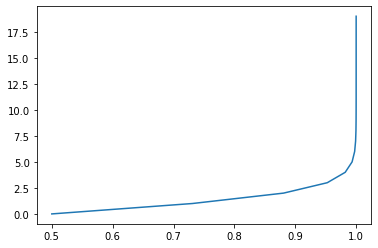

In [2]:
n=np.arange(0,20)
u=[]
for i in range(0,20):
    u.append((math.exp(i))/(1+math.exp(i)))
plt.plot(u,n)

### Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt

In [4]:
ad=pd.read_csv('Advertising.csv',usecols=[1,2,3,4])
df=ad.copy()
#data=pd.read_csv('https://raw.githubusercontent.com/caglarmert/UVBMOB/master/titanic_train.csv') # veriseti yoksa internetten çekmek için

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


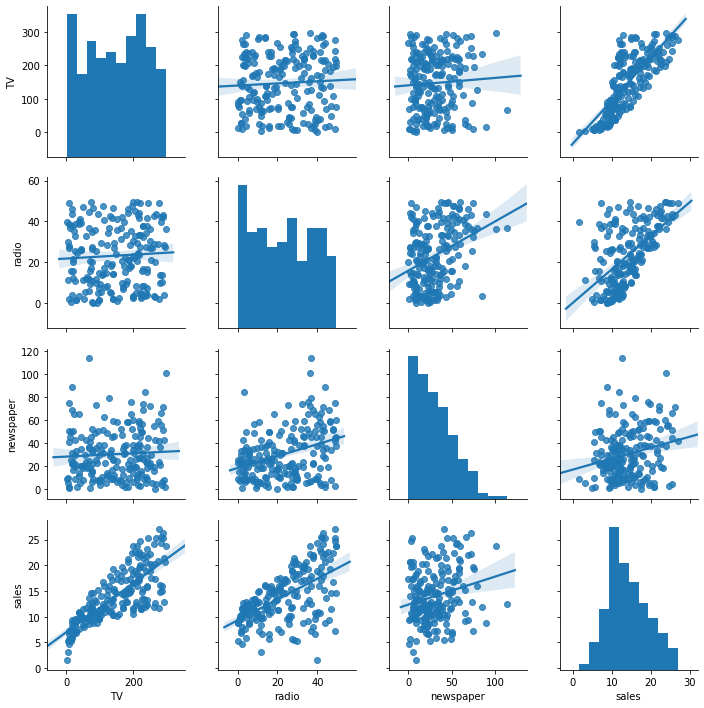

In [8]:

sns.pairplot(df,kind="reg")

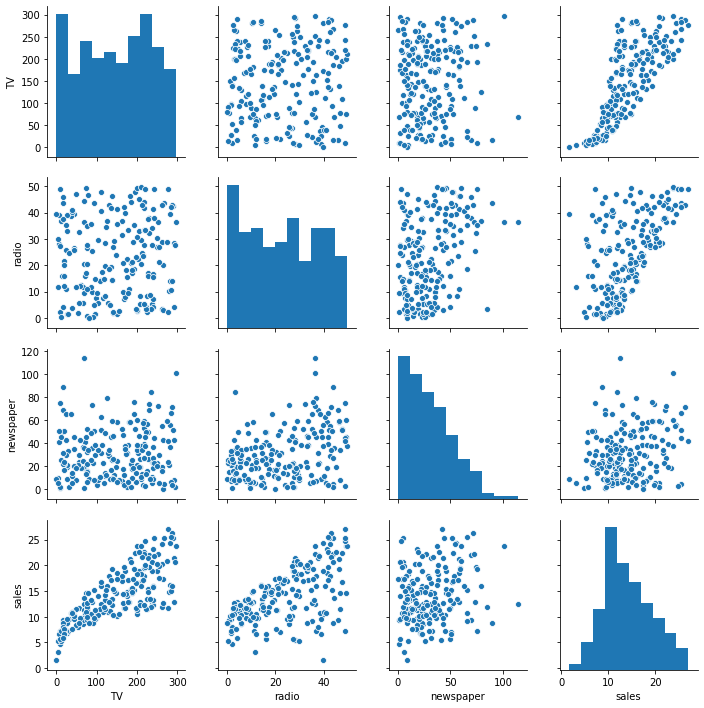

In [9]:
sns.pairplot(df,kind="scatter")

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


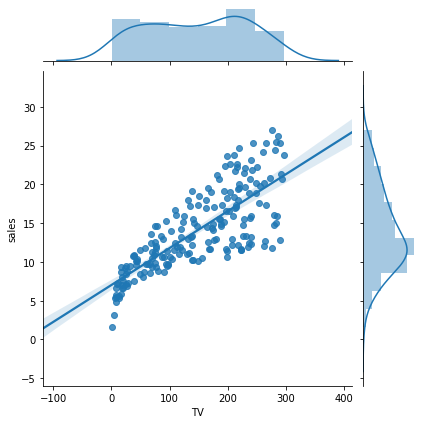

In [11]:
sns.jointplot(x=df['TV'],y=df['sales'],kind='reg')

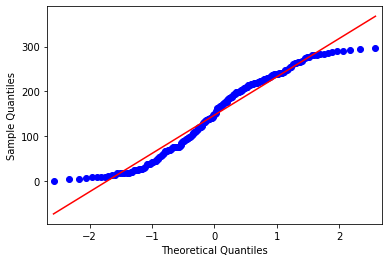

In [12]:
sm.qqplot(df['TV'],line='s')
pylab.show()

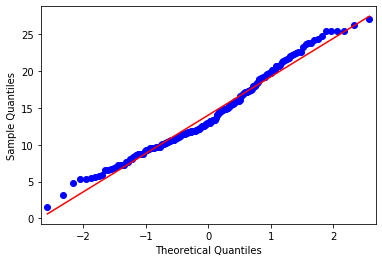

In [13]:
sm.qqplot(df['sales'],line='s')
pylab.show()

In [14]:
X=df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
X = sm.add_constant(X)
X[0:5]

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [16]:
y = df['sales']
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [17]:
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        15:56:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales=7.0326+0.0475 TV

Adj. R-squared:	0.610
F-statistic:	312.1

In [18]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           1.47e-42
Time:                        15:56:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [22]:
model.f_pvalue
print("f_pvalue          :" , "%.4f" % model.f_pvalue)
print("f value           :" , "%.2f" % model.fvalue)
print("Intercept t value :" , "%.2f" % model.tvalues[0:1])
print("TV t value        :" , "%.2f" % model.tvalues[1:2])

f_pvalue          : 0.0000
f value           : 312.14
Intercept t value : 15.36
TV t value        : 17.67


In [23]:
model.rsquared_adj

0.6099148238341623

In [24]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [25]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
X['TV'][0:5]

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [27]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['TV'][i]*float(model.params[1])+float(model.params[0]))

In [28]:
y_predicted[0:5]

[17.970774512765537,
 9.147974048397073,
 7.8502237645756345,
 14.234394574730185,
 15.627218139417664]

In [29]:
diff=y_predicted-y

In [30]:
diff[0:5]

0   -4.129225
1   -1.252026
2   -1.449776
3   -4.265605
4    2.727218
Name: sales, dtype: float64

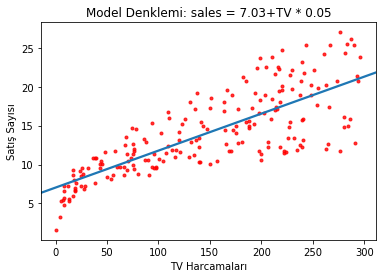

In [31]:
g = sns.regplot(df['TV'],df['sales'], ci=None, scatter_kws={'color':'red','s':9})
g.set_title('Model Denklemi: sales = 7.03+TV * 0.05')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')
fig = g.get_figure()
fig.savefig("output.png")

In [32]:

X = df[['TV']]
y= df['sales']
reg = LinearRegression()
model= reg.fit(X,y)

In [33]:
model.intercept_

7.032593549127695

In [34]:
model.coef_[0]

0.04753664043301975

In [35]:
model.score(X,y)

0.611875050850071

In [36]:
prediction=model.predict(X)
prediction[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [37]:
error_df=prediction-y

In [38]:
error_arr=error_df.values

In [39]:
error_df.var()

10.565480317242969

In [40]:
error_df.abs().mean()

2.549806038927486

In [41]:
print(" 30 TV reklamına karşılık gelen satış: " + str(float(model.predict([[30]]))))

 30 TV reklamına karşılık gelen satış: 8.458692762118288


In [42]:
lm = smf.ols("sales ~TV",df)
model= lm.fit()
model.summary()
mse= mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [43]:
mse/model.fittedvalues.mean()

0.7496989064472638

In [44]:
import numpy as np

In [45]:
rmse=np.sqrt(mse)
print(rmse)
reg.predict(X)[0:10]
print(y[0:10])


3.2423221486546887
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64


In [46]:
k_t = pd.DataFrame({'gercek_y':y[0:10],'tahmin_y':reg.predict(X)[0:10]})

In [47]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [48]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [49]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [50]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [51]:
model.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

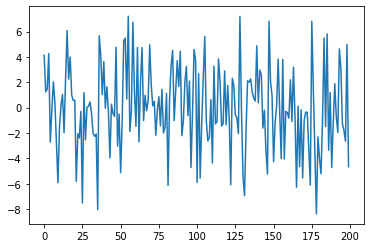

In [52]:
plt.plot(model.resid)

In [53]:
print (np.sum(k_t['hata_kare']))
print (np.mean(k_t['hata_kare']))
print (np.average(((k_t['hata']).abs())))
print (np.sqrt(np.mean(k_t['hata_kare'])))

92.90350329638102
9.290350329638102
2.5129388421137904
3.048007599996775
